<a href="https://colab.research.google.com/github/Hamza-Khan993/GRIP-at-The-Spark-Foundation/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**


***In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.***
***Data can be found at http://bit.ly/w-data***

***What will be predicted score if a student study for 9.25 hrs in a
day?***

Importing all neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Extracting Data and creating a dataframe using Pandas

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Understanding correlation between dependent and independent variable
 

In [4]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Exploratory Data Analysis**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

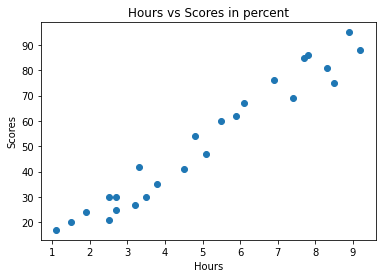

In [11]:
plt.scatter(data['Hours'],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores in percent")
plt.show()

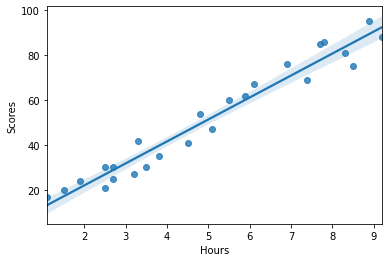

In [12]:
sns.regplot(data['Hours'],data["Scores"])
plt.show()

Both dependent and independent variables are linearly variable to each other

X = Independent Variable

Y= Dependent Variable

In [101]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, 1].values  
# print(X)
# print(X.shape)
# print(Y)
# print(Y.shape)

**Splitting Data into training and testing sets**

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size= 0.2 , random_state = 42)


In [94]:
lm = LinearRegression()

**Training Model**

In [95]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
w = lm.coef_
b = lm.intercept_
print(w,b)

[9.68207815] 2.826892353899737


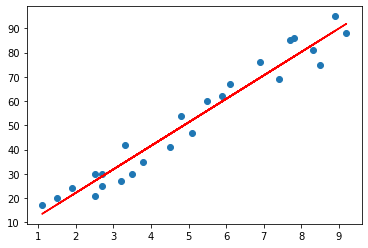

In [97]:
best_fit_line = w*X + b
plt.scatter(X,Y)
plt.plot(X, best_fit_line,color="red")
plt.show()

**Prediction Using Testing set**

In [98]:
yhat = lm.predict(X_test)
print(yhat)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


Comparing with actual Values

In [99]:
Y_test

array([81, 30, 21, 76, 62])

In [100]:
data_compare = pd.DataFrame({'Actual': Y_test, 'Predicted': yhat})
data_compare

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


Calculating the Accuracy of the model

In [328]:
accuracy = r2_score(Y_test, yhat)
print("The accuracy of our model is :", accuracy*100, "percent")

The accuracy of our model is : 94.54906892105353 percent


****Evaluation****

In [291]:
no_of_hours = 9.25
n_hours = np.array(no_of_hours).reshape(1,-1)
n_hours
calculated_score = clf.predict(n_hours)
print("If a Student Studies for ", no_of_hours, " hours a day he/she will score :", calculated_score[0][0], "%")

If a Student Studies for  9.25  hours a day he/she will score : 93.69173248737539 %
